In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
jobData = pd.read_csv('job-market.csv')
wineData = pd.read_csv('wine.data.csv')

In [11]:
jobData.dtypes

Id                   float64
Title                 object
Company               object
Date                  object
Location              object
Area                  object
Classification        object
SubClassification     object
Requirement           object
FullDescription       object
LowestSalary         float64
HighestSalary        float64
JobType               object
dtype: object

In [12]:
wineData.dtypes

Label                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

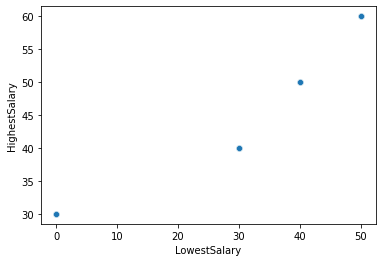

In [13]:
testScatterPlot = sns.scatterplot(x="LowestSalary", y="HighestSalary", data=jobData)

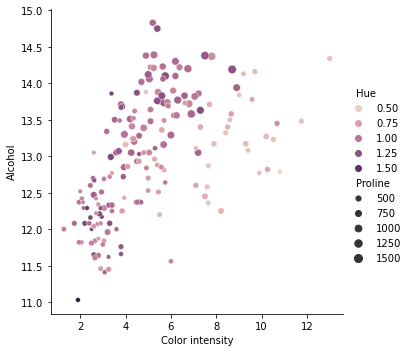

In [14]:
sns.relplot(x="Color intensity", y="Alcohol", kind="scatter", hue="Hue", size="Proline", data=wineData)

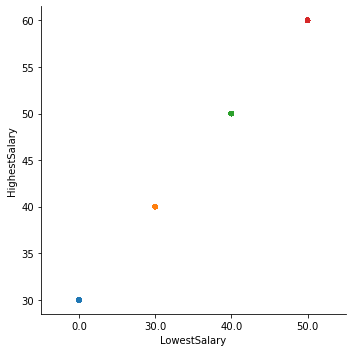

In [16]:
sns.catplot(x="LowestSalary", y="HighestSalary", data=jobData, kind="strip", jitter=False, dodge=True)

In [17]:
from sklearn.decomposition import PCA as sklearnPCA

In [18]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, header=None)

y = data[4] #split off classifications
x = data.iloc[:,0:4] #split off features

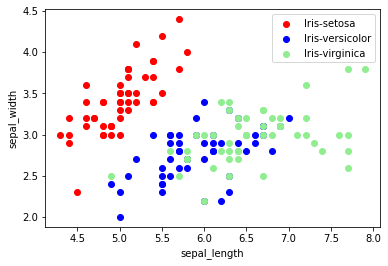

In [20]:
plt.scatter(x[y=="Iris-setosa"].iloc[:,0], x[y=="Iris-setosa"].iloc[:,1], label="Iris-setosa", c="red")
plt.scatter(x[y=="Iris-versicolor"].iloc[:,0], x[y=="Iris-versicolor"].iloc[:,1], label="Iris-versicolor", c="blue")
plt.scatter(x[y=="Iris-virginica"].iloc[:,0], x[y=="Iris-virginica"].iloc[:,1], label="Iris-virginica", c="lightgreen")

plt.legend()
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")

plt.show()

In [21]:
x_norm = (x - x.min())/(x.max() - x.min()) #normalise data

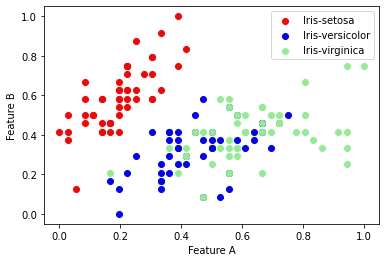

In [22]:
plt.scatter(x_norm[y=="Iris-setosa"].iloc[:,0], x_norm[y=="Iris-setosa"].iloc[:,1], label="Iris-setosa", c="red")
plt.scatter(x_norm[y=="Iris-versicolor"].iloc[:,0], x_norm[y=="Iris-versicolor"].iloc[:,1], label="Iris-versicolor", c="blue")
plt.scatter(x_norm[y=="Iris-virginica"].iloc[:,0], x_norm[y=="Iris-virginica"].iloc[:,1], label="Iris-virginica", c="lightgreen")

plt.legend()
plt.xlabel("Feature A")
plt.ylabel("Feature B")

plt.show()

In [23]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(x_norm))

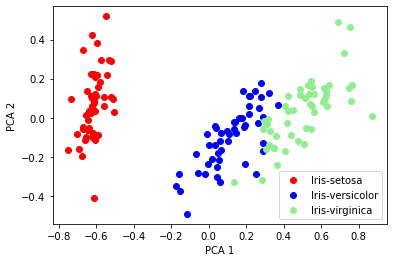

In [25]:
plt.scatter(transformed[y=="Iris-setosa"].iloc[:,0], transformed[y=="Iris-setosa"].iloc[:,1], label="Iris-setosa", c="red")
plt.scatter(transformed[y=="Iris-versicolor"].iloc[:,0], transformed[y=="Iris-versicolor"].iloc[:,1], label="Iris-versicolor", c="blue")
plt.scatter(transformed[y=="Iris-virginica"].iloc[:,0], transformed[y=="Iris-virginica"].iloc[:,1], label="Iris-virginica", c="lightgreen")

plt.legend()
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.show()

<AxesSubplot:xlabel='count', ylabel='Classification'>

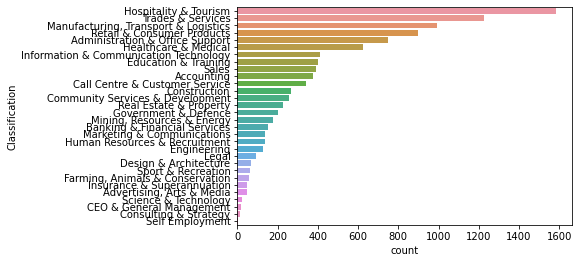

In [32]:
sns.countplot(y="Classification", data=jobData, order=jobData['Classification'].value_counts().index)
#Lab instructions asked for this to be by Location, but by classification looks better

<AxesSubplot:ylabel='Number of jobs by salary range'>

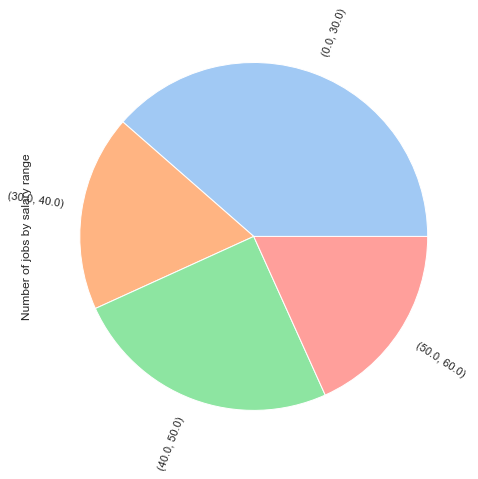

In [68]:
jobsBySalary = jobData.groupby(['LowestSalary', 'HighestSalary']).size()
jobsBySalary.plot.pie(colors = sns.color_palette("pastel"), ylabel="Number of jobs by salary range", rotatelabels = 'true')

In [34]:
wineData.head(5)

,Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [41]:
wineDataLabel = wineData["Label"]
wineData.drop(columns=["Label"], inplace=True)
wineDataLabel.head(2)

0    1
1    1
Name: Label, dtype: int64

In [43]:
wineData.dtypes

Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

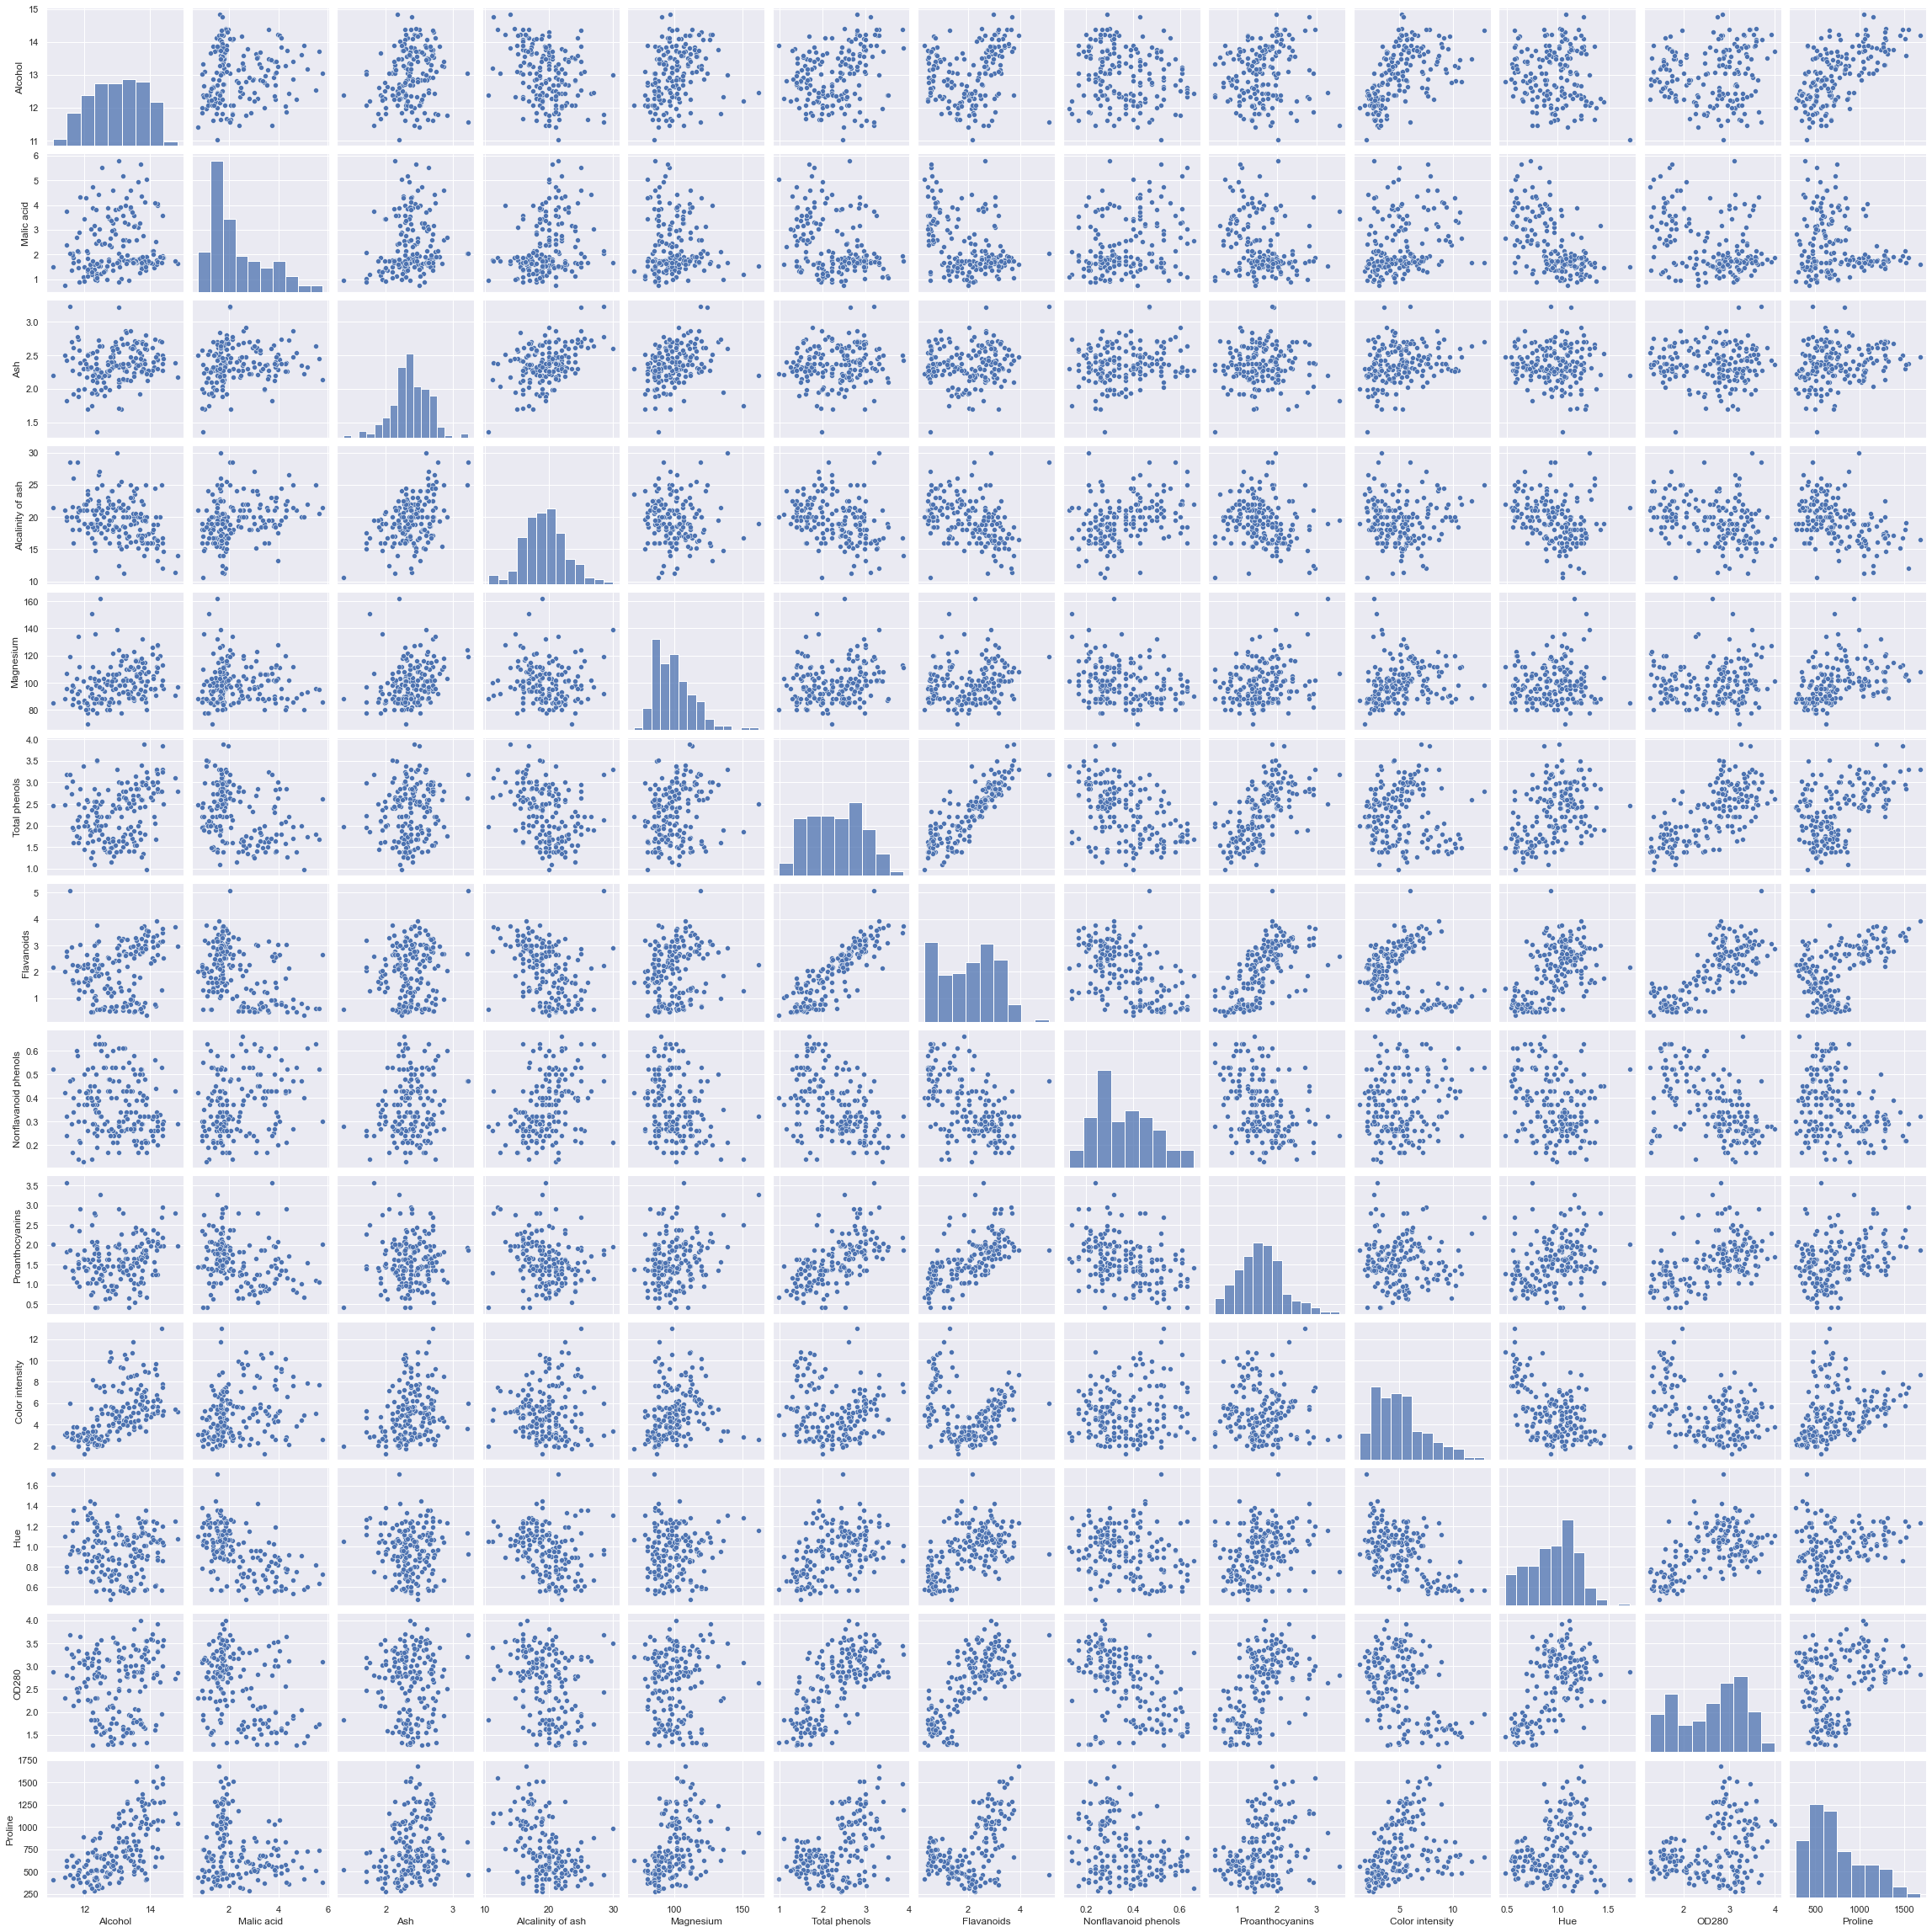

In [69]:
sns.pairplot(wineData)

In [45]:
#It appears that most of the variables are not stringly correlated. 
#Some variables shows indication of being correlated, in particular Total phenols and Flavanoids.

<AxesSubplot:>

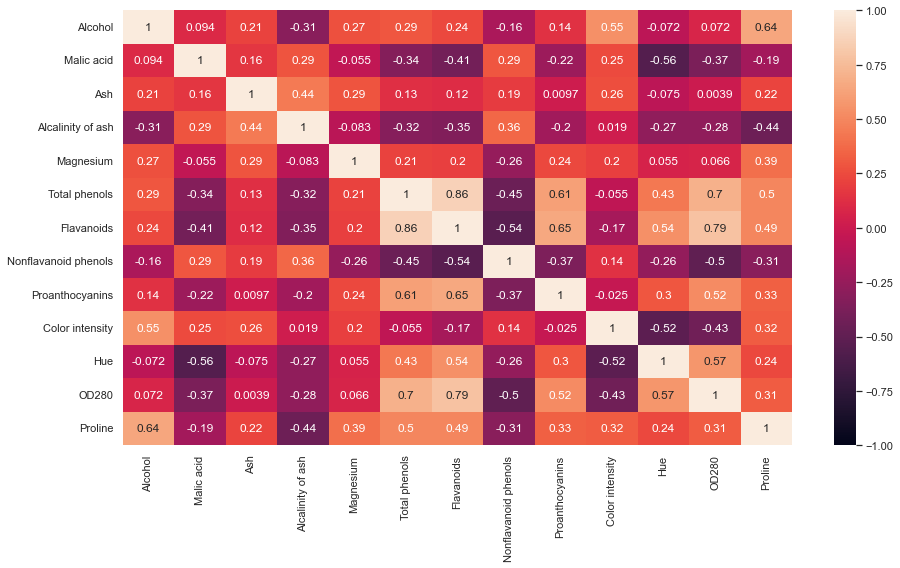

In [49]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(wineData.corr(), vmin=-1, vmax=1, annot=True)

In [50]:
#The three variable pairs with the stringest correlation is Total phenols - Flavanoids (0.86), 
#OD280 - Flavanoids (0.79), and OD280 - Total phenols (0.7)